## Importing Relevant Libraries and Reading the Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #for adjusting plot configurations


df = pd.read_csv('movies.csv')
df.head() #displays the top 5 columns of df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

In [2]:
# Finding missing values in the data
df.isnull() .sum().head()

name         0
rating      76
genre        0
year         0
released     0
dtype: int64

In [3]:
# Dropping missing variables
df.dropna(axis = 0, inplace = True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking data types of each column in the data
df.dtypes.head()

name        object
rating      object
genre       object
year         int64
released     int64
dtype: object

In [5]:
# Data types for gross, budget, runtime and votes are floats
# But the are no digits after the decimals. So we can change their types to int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [7]:
# Data in the year column do not correspond to data in the released column
# So we can create the correct year column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [8]:
df['yearcorrect'] = df['yearcorrect'].astype('int64')
df.dtypes.head()

name        object
rating      object
genre       object
year         int64
released     int64
dtype: object

In [9]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,Avatar,PG-13,Action,2009,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7386,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2992,Titanic,PG-13,Drama,1997,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6604,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7185,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [10]:
# Checking for and dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,Avatar,PG-13,Action,2009,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7386,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2992,Titanic,PG-13,Drama,1997,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6604,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7185,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## EDA and Correlations

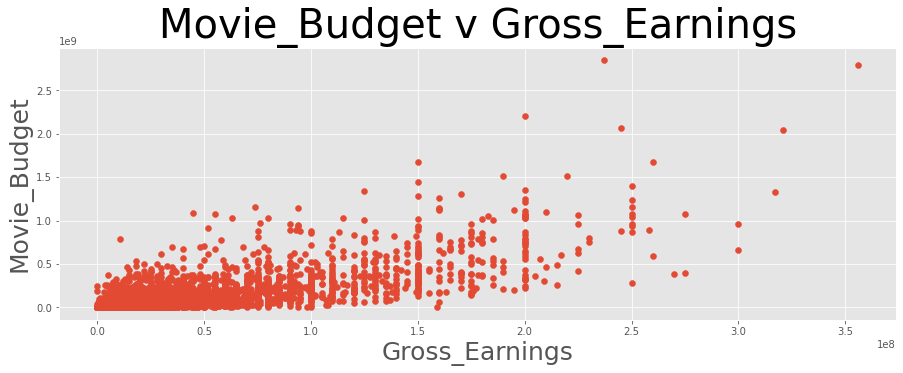

In [12]:
# Scatter of budget and gross 
figure = plt.figure(figsize=(15,5))
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Movie_Budget v Gross_Earnings', size=40)
plt.xlabel('Gross_Earnings', size=25)
plt.ylabel('Movie_Budget', size=25)
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

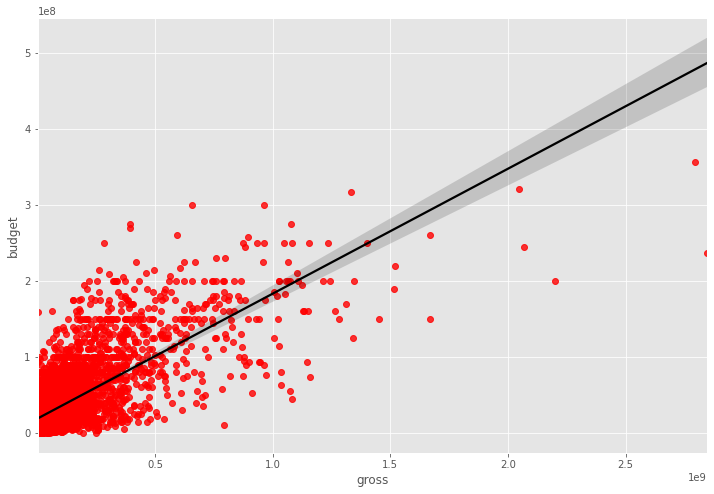

In [13]:
# Plotting budget v gross using sns
sns.regplot(x='gross', y='budget', data=df,scatter_kws={"color":"red"}, line_kws={"color":"black"})

#### Gross_earnings are positively correlated with movie_budget

In [14]:
# Getting correlation table for df
df.corr()

,year,released,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.998962,0.055681,0.204904,0.326740,0.273512,0.074849,0.998962
released,0.998962,1.000000,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000
score,0.055681,0.061443,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.204904,0.202215,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.326740,0.319669,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.273512,0.268141,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.074849,0.075183,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
yearcorrect,0.998962,1.000000,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


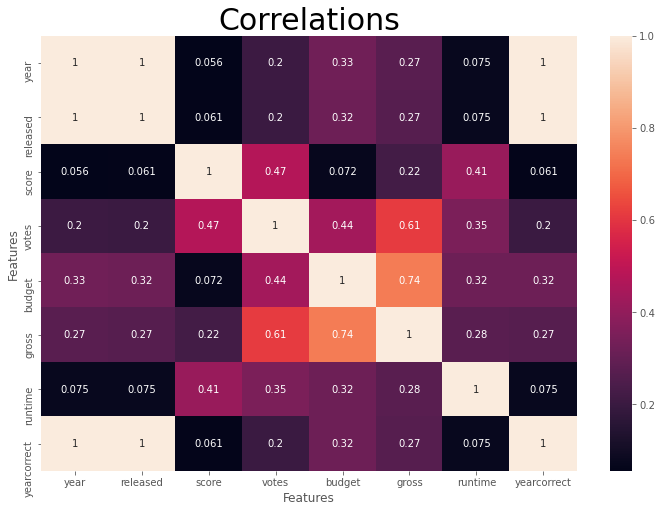

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlations", size=30)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,Avatar,PG-13,Action,2009,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7386,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2992,Titanic,PG-13,Drama,1997,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6604,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7185,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [17]:
## Change the categorical features into categories and replace with an integer values for distinct category
df_numerical = df.copy()
for col in df_numerical.columns:
    if(df_numerical[col].dtype == 'object'):
        df_numerical[col] = df_numerical[col].astype('category')
        df_numerical[col] = df_numerical[col].cat.codes
df_numerical.head()        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,386,5,0,2009,2009,7.8,1100000,781,1260,1527,47,237000000,2847246203,1376,162,2009
7386,388,5,0,2019,2019,8.4,903000,105,510,1463,47,356000000,2797501328,978,181,2019
2992,4895,5,6,1997,1997,7.8,1100000,781,1260,1067,47,200000000,2201647264,1376,194,1997
6604,3632,5,0,2015,2015,7.8,876000,765,1803,355,47,245000000,2069521700,940,138,2015
7185,389,5,0,2018,2018,8.4,897000,105,510,1463,47,321000000,2048359754,978,149,2018


In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,Avatar,PG-13,Action,2009,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7386,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2992,Titanic,PG-13,Drama,1997,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6604,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7185,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


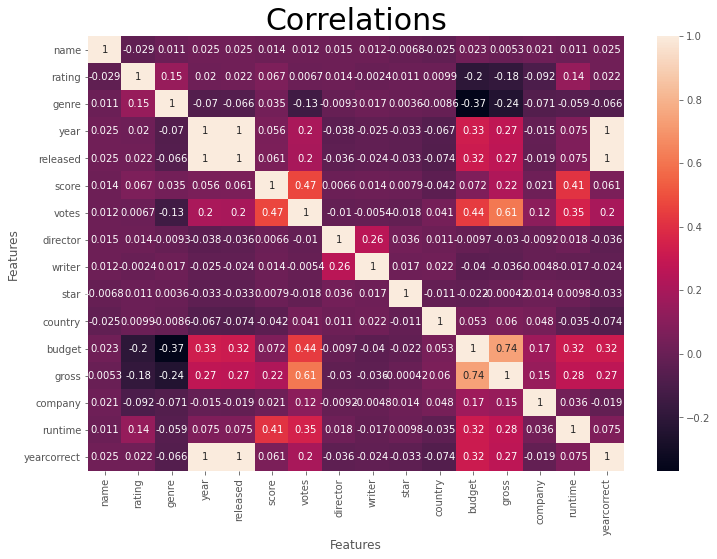

In [19]:
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlations", size=30)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [20]:
df_numerical.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029220,0.010840,0.025111,0.025485,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,0.025485
rating,-0.029220,1.000000,0.148529,0.019746,0.022089,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,0.022089
genre,0.010840,0.148529,1.000000,-0.070039,-0.066049,0.035158,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148,-0.066049
year,0.025111,0.019746,-0.070039,1.000000,0.998962,0.055681,0.204904,-0.037613,-0.024854,-0.032527,-0.067134,0.326740,0.273512,-0.015400,0.074849,0.998962
released,0.025485,0.022089,-0.066049,0.998962,1.000000,0.061443,0.202215,-0.036274,-0.024065,-0.032943,-0.074050,0.319669,0.268141,-0.019378,0.075183,1.000000


In [21]:
correlation_matrix = df_numerical.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029220
      genre       0.010840
      year        0.025111
      released    0.025485
dtype: float64

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368226
genre   budget   -0.368226
        gross    -0.243547
gross   genre    -0.243547
budget  rating   -0.203553
dtype: float64

In [23]:
## Showing columns with high correlation
high_correlation = sorted_pairs[(sorted_pairs)>0.5]

In [24]:
high_correlation.head()

gross   votes       0.614432
votes   gross       0.614432
gross   budget      0.740028
budget  gross       0.740028
year    released    0.998962
dtype: float64

## Exploratory Data Analysis

In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5391,Avatar,PG-13,Action,2009,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7386,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
2992,Titanic,PG-13,Drama,1997,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6604,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7185,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [26]:
# Movies
clips = df.groupby(['name','company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
clips.head(10)

<ipython-input-26-e58908a2fafb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clips = df.groupby(['name','company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)


,,budget,gross
name,company,,
Avatar,Twentieth Century Fox,237000000,2847246203
Avengers: Endgame,Marvel Studios,356000000,2797501328
The Lion King,Walt Disney Pictures,305000000,2754448457
Titanic,Twentieth Century Fox,200000000,2201647264
Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000,2069521700
Avengers: Infinity War,Marvel Studios,321000000,2048359754
Jurassic World,Universal Pictures,150000000,1670516444
Aladdin,Walt Disney Pictures,211000000,1554744172
The Avengers,Marvel Studios,220000000,1518815515


In [27]:
clips=clips.reset_index()
clips.to_csv("movies_companies_budgets_gross.csv", index=False)
clips

,name,company,budget,gross
0,Avatar,Twentieth Century Fox,237000000,2847246203
1,Avengers: Endgame,Marvel Studios,356000000,2797501328
2,The Lion King,Walt Disney Pictures,305000000,2754448457
3,Titanic,Twentieth Century Fox,200000000,2201647264
4,Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000,2069521700
...,...,...,...,...
5388,Tanner Hall,Two Prong Lesson,3000000,5073
5389,Philadelphia Experiment II,Trimark Pictures,5000000,2970
5390,Ginger Snaps,Copperheart Entertainment,5000000,2554
5391,Parasite,Embassy Pictures,800000,2270


In [28]:
top10clips = clips.head(10)
top10clips

,name,company,budget,gross
0,Avatar,Twentieth Century Fox,237000000,2847246203
1,Avengers: Endgame,Marvel Studios,356000000,2797501328
2,The Lion King,Walt Disney Pictures,305000000,2754448457
3,Titanic,Twentieth Century Fox,200000000,2201647264
4,Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000,2069521700
5,Avengers: Infinity War,Marvel Studios,321000000,2048359754
6,Jurassic World,Universal Pictures,150000000,1670516444
7,Aladdin,Walt Disney Pictures,211000000,1554744172
8,The Avengers,Marvel Studios,220000000,1518815515
9,Furious 7,Universal Pictures,190000000,1515341399


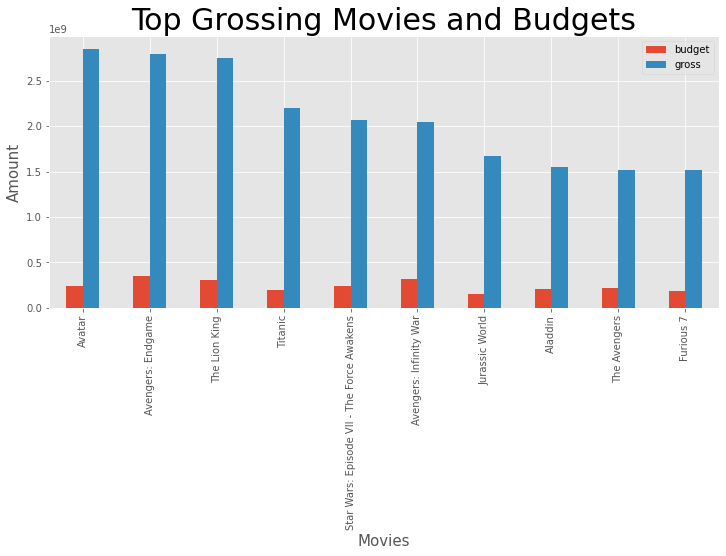

In [29]:
top10clips.plot(x='name',y=['budget','gross'],kind='bar', figsize=(12,5))
plt.title("Top Grossing Movies and Budgets",size=30)
plt.xlabel("Movies",size=15)
plt.ylabel("Amount",size=15)
plt.show()

In [30]:
# Companies
coys = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
coys.head(10)

<ipython-input-30-0a7536cd1131>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coys = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)


,budget,gross
company,,
Warner Bros.,19503300000,54610959970
Universal Pictures,15989730001,51241105418
Columbia Pictures,15512107000,42356430218
Paramount Pictures,13723450000,40021704691
Twentieth Century Fox,11457100000,39541625997
Walt Disney Pictures,10404700000,35833650748
New Line Cinema,5645200000,19612851164
Marvel Studios,2664000000,15065592411
DreamWorks Animation,3344000000,11873612858


In [31]:
topcoys=coys.reset_index()
topcoys.head()

,company,budget,gross
0,Warner Bros.,19503300000,54610959970
1,Universal Pictures,15989730001,51241105418
2,Columbia Pictures,15512107000,42356430218
3,Paramount Pictures,13723450000,40021704691
4,Twentieth Century Fox,11457100000,39541625997


In [32]:
topcoys.to_csv('Companies with Most Budgets and Gross.csv', index=False)

In [33]:
topcoys = topcoys.head()
topcoys

,company,budget,gross
0,Warner Bros.,19503300000,54610959970
1,Universal Pictures,15989730001,51241105418
2,Columbia Pictures,15512107000,42356430218
3,Paramount Pictures,13723450000,40021704691
4,Twentieth Century Fox,11457100000,39541625997


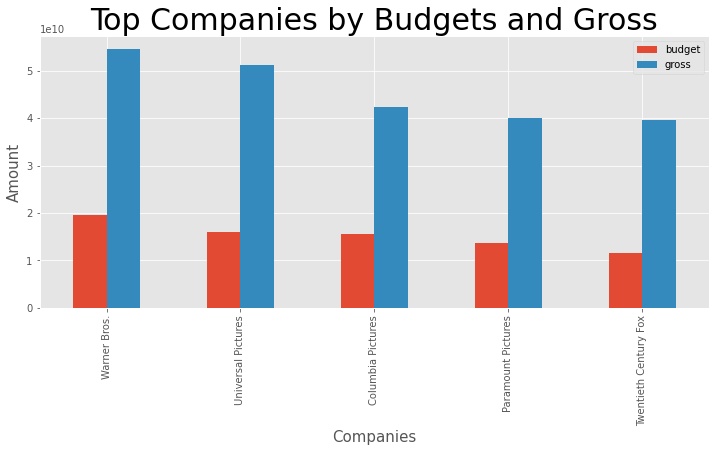

In [34]:
topcoys.plot(x='company',y=['budget','gross'],kind='bar', figsize=(12,5))
plt.title("Top Companies by Budgets and Gross",size=30)
plt.xlabel("Companies",size=15)
plt.ylabel("Amount",size=15)
plt.show()

In [35]:
# Countries
topcountries = df.groupby(['country'])['budget','gross'].sum().sort_values(by=['gross'],ascending=False)
topcountries

<ipython-input-35-08c760f4d3f4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topcountries = df.groupby(['country'])['budget','gross'].sum().sort_values(by=['gross'],ascending=False)


,budget,gross
country,,
United States,161398335145,470791654642
United Kingdom,16422523780,45348945433
France,3303000000,6568114154
China,1846400000,6305918953
New Zealand,1120100000,6278354563
Canada,2542177000,5734558085
Germany,3344750000,5688083409
Australia,1080950000,2800304264
Japan,638100000,2494214085


In [36]:
topcountries.reset_index(inplace=True)

In [37]:
topcountries.to_csv("Countries' Movie Budgets and Gross.csv", index=False)

In [38]:
top10countries = topcountries.head(10)
top10countries.reset_index(inplace=True)

In [39]:
top10countries.to_csv("Countries with most budgets and gross.csv", index=False)
top10countries

,index,country,budget,gross
0,0,United States,161398335145,470791654642
1,1,United Kingdom,16422523780,45348945433
2,2,France,3303000000,6568114154
3,3,China,1846400000,6305918953
4,4,New Zealand,1120100000,6278354563
5,5,Canada,2542177000,5734558085
6,6,Germany,3344750000,5688083409
7,7,Australia,1080950000,2800304264
8,8,Japan,638100000,2494214085
9,9,Hong Kong,653428966,1412222241
